In [4]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker

In [23]:
from gsw import f

In [11]:
# time period
start_time = '1995-01-01'
end_time = '2000-01-01'

In [12]:
session = cc.database.create_session()

In [13]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/41545/status,
Dashboard: /proxy/41545/status,Workers: 7
Total threads: 28,Total memory: 200.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35003,Workers: 7
Dashboard: /proxy/41545/status,Total threads: 28
Started: Just now,Total memory: 200.00 GiB
Comm: tcp://127.0.0.1:46427,Total threads: 4
Dashboard: /proxy/42251/status,Memory: 28.57 GiB
Nanny: tcp://127.0.0.1:34003,


In [14]:
hmo = cc.querying.getvar(expt='panant-01-hycom1-v13', variable='hmo', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'area:mean rho2_l:sum yh:mean xh:mean time: mean'},
                          start_time='1991-01-31 00:00:00', 
                          end_time='2000-12-31 00:00:00').sel(time = slice(start_time,end_time))

Exception during reset or similar
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 558, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22425107760960 and this is thread id 22420663301888.
Exception closing connection <sqlite3.Connection object at 0x1464a06d9300>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/sqlalchemy/pool/b

In [15]:
hmo

,Array,Chunk
Bytes,53.72 GiB,2.85 MiB
Shape,"(60, 79, 845, 3600)","(1, 12, 121, 515)"
Count,102940 Tasks,20580 Chunks
Type,float32,numpy.ndarray


In [16]:
hmo = hmo.mean('time')

In [19]:
h_up = hmo.sel(yh = slice(-90,-45)).sel(rho2_l = slice(0,1037.10)).sum('rho2_l').load()
h_down = hmo.sel(yh = slice(-90,-45)).sel(rho2_l = slice(1037.10,1038.0)).sum('rho2_l').load()

In [24]:
# compute the f(s-1) in each latitude
xh = h_up.xh
yh = h_up.yh

f = xr.DataArray(f(yh), coords = [yh], dims = ['yh'], name = 'coriolis parameter', attrs = {'units':'s-1'})

In [25]:
f

<xarray.DataArray 'coriolis parameter' (yh: 740)>
array([-0.00014409, -0.00014407, -0.00014406, -0.00014404, -0.00014402,
       -0.00014401, -0.00014399, -0.00014397, -0.00014395, -0.00014394,
       -0.00014392, -0.0001439 , -0.00014388, -0.00014387, -0.00014385,
       -0.00014383, -0.00014381, -0.0001438 , -0.00014378, -0.00014376,
       -0.00014374, -0.00014372, -0.00014371, -0.00014369, -0.00014367,
       -0.00014365, -0.00014363, -0.00014361, -0.00014359, -0.00014357,
       -0.00014356, -0.00014354, -0.00014352, -0.0001435 , -0.00014348,
       -0.00014346, -0.00014344, -0.00014342, -0.0001434 , -0.00014338,
       -0.00014336, -0.00014334, -0.00014332, -0.0001433 , -0.00014328,
       -0.00014326, -0.00014324, -0.00014322, -0.0001432 , -0.00014318,
       -0.00014316, -0.00014314, -0.00014312, -0.0001431 , -0.00014308,
       -0.00014306, -0.00014304, -0.00014302, -0.00014299, -0.00014297,
       -0.00014295, -0.00014293, -0.00014291, -0.00014289, -0.00014287,
       -0.00014284, -0.00014282, -0.0001428 , -0.00014278, -0.00014276,
       -0.00014274, -0.00014271, -0.00014269, -0.00014267, -0.00014265,
       -0.00014262, -0.0001426 , -0.00014258, -0.00014256, -0.00014253,
       -0.00014251, -0.00014249, -0.00014246, -0.00014244, -0.00014242,
       -0.0001424 , -0.00014237, -0.00014235, -0.00014233, -0.0001423 ,
       -0.00014228, -0.00014225, -0.00014223, -0.00014221, -0.00014218,
       -0.00014216, -0.00014214, -0.00014211, -0.00014209, -0.00014206,
...
       -0.00011431, -0.00011421, -0.00011411, -0.00011401, -0.00011391,
       -0.00011381, -0.00011371, -0.00011361, -0.00011351, -0.00011341,
       -0.00011331, -0.00011321, -0.00011311, -0.00011301, -0.0001129 ,
       -0.0001128 , -0.0001127 , -0.0001126 , -0.00011249, -0.00011239,
       -0.00011229, -0.00011218, -0.00011208, -0.00011198, -0.00011187,
       -0.00011177, -0.00011166, -0.00011156, -0.00011145, -0.00011134,
       -0.00011124, -0.00011113, -0.00011102, -0.00011092, -0.00011081,
       -0.0001107 , -0.00011059, -0.00011048, -0.00011038, -0.00011027,
       -0.00011016, -0.00011005, -0.00010994, -0.00010983, -0.00010972,
       -0.00010961, -0.0001095 , -0.00010939, -0.00010927, -0.00010916,
       -0.00010905, -0.00010894, -0.00010883, -0.00010871, -0.0001086 ,
       -0.00010849, -0.00010837, -0.00010826, -0.00010814, -0.00010803,
       -0.00010791, -0.0001078 , -0.00010768, -0.00010757, -0.00010745,
       -0.00010733, -0.00010722, -0.0001071 , -0.00010698, -0.00010686,
       -0.00010675, -0.00010663, -0.00010651, -0.00010639, -0.00010627,
       -0.00010615, -0.00010603, -0.00010591, -0.00010579, -0.00010567,
       -0.00010555, -0.00010543, -0.00010531, -0.00010518, -0.00010506,
       -0.00010494, -0.00010482, -0.00010469, -0.00010457, -0.00010445,
       -0.00010432, -0.0001042 , -0.00010407, -0.00010395, -0.00010382,
       -0.0001037 , -0.00010357, -0.00010344, -0.00010332, -0.00010319])
Coordinates:
  * yh       (yh) float64 -81.11 -81.07 -81.02 -80.98 ... -45.18 -45.11 -45.04
Attributes:
    units:    s-1

In [26]:

f = f.values

In [27]:
h_up

<xarray.DataArray 'hmo' (yh: 740, xh: 3600)>
array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [2868.3257, 2890.1138, 3170.7966, ..., 3119.3223, 3144.184 ,
        3156.5894],
       [3132.0623, 3064.88  , 3179.5405, ..., 3176.3943, 3125.2407,
        3117.7793],
       [3196.9302, 3215.1855, 3236.0283, ..., 3183.7285, 3106.0942,
        3126.2068]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yh       (yh) float64 -81.11 -81.07 -81.02 -80.98 ... -45.18 -45.11 -45.04

2022-08-01 14:09:50,770 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:50,778 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:50,826 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:50,874 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:50,889 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:50,964 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:51,057 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:51,920 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:51,976 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:51,981 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:52,074 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:52,078 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:52,080 - distributed.nanny - WARNING - Restarting worker
2022-08-01 14:09:52,202 - distributed.

In [28]:
f_1 = np.zeros((740,3600))
for i in range(740):
    f_1[i,:] = f[i]

In [30]:
depth_inverse_up = (f_1/h_up).load()
depth_inverse_down = (f_1/h_down).load()

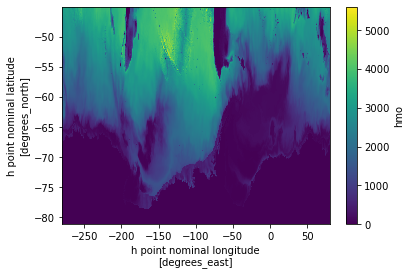

In [35]:
h_up.plot()

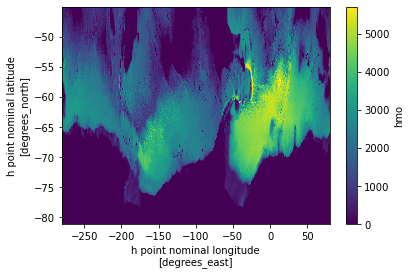

In [38]:
h_down.plot()

In [32]:
# get the depth
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

Text(0, 0.5, '(f/h $10^{-8}$m$^{-1}$ s$^{-1}$)')

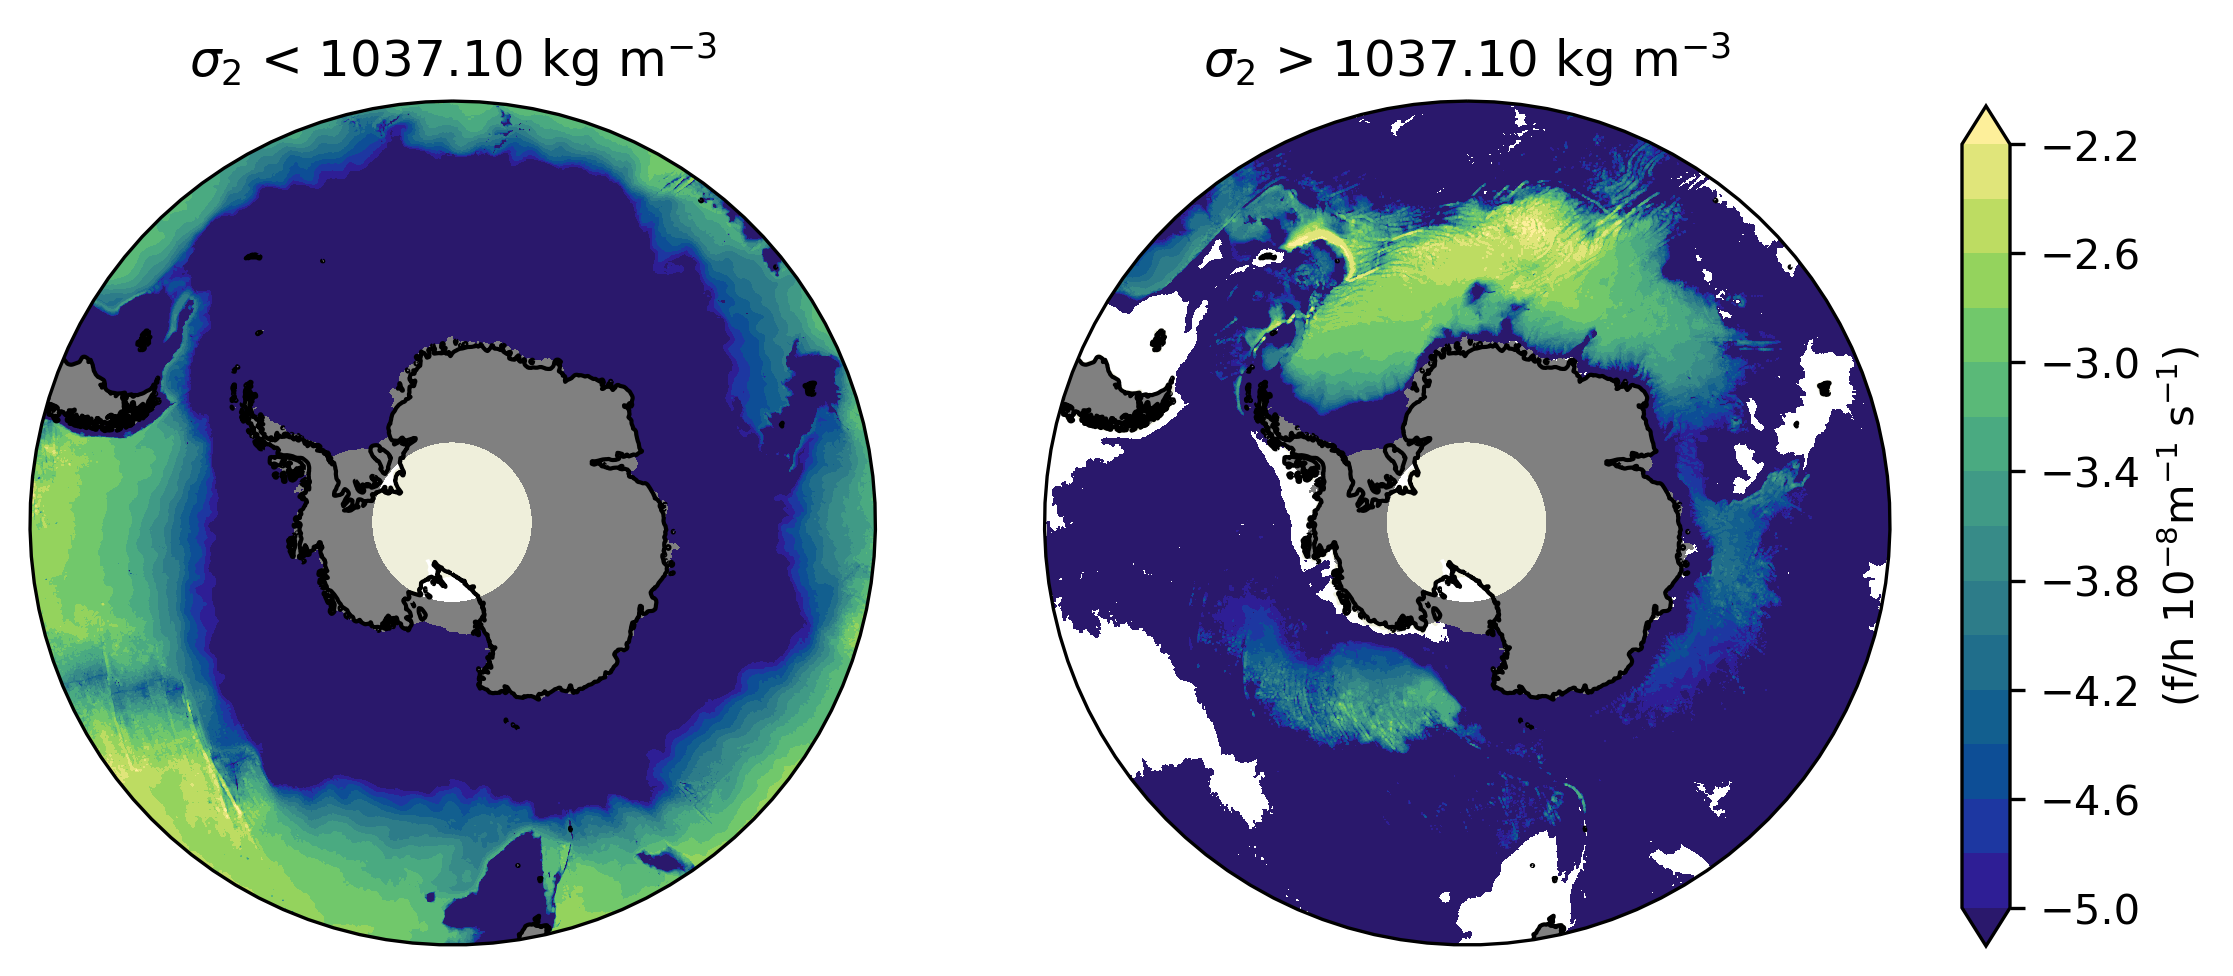

In [37]:
# plot the intro map
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = plt.subplot(1,2,1,projection = projection)
#ax.gridlines(draw_labels=True)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = (depth_inverse_up*1e8).plot.contourf(ax=ax, levels =np.arange(-5,-2,0.2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.haline,add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-45], crs = ccrs.PlateCarree())
ax.set_title('$\sigma_{2}$ < 1037.10 kg m$^{-3}$')

ax = plt.subplot(1,2,2,projection = projection)
#ax.gridlines(draw_labels=True)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
p1 = (depth_inverse_down*1e8).plot.contourf(ax=ax, levels =np.arange(-5,-2,0.2),transform=ccrs.PlateCarree(),
                              cmap=cm.cm.haline,add_colorbar = False)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280,80,-82,-45], crs = ccrs.PlateCarree())
ax.set_title('$\sigma_{2}$ > 1037.10 kg m$^{-3}$')

# colorbar 
ax = plt.axes([0.93, 0.15, 0.02, 0.7])
cb = plt.colorbar(p1, cax=ax, orientation='vertical',extend = 'both')
cb.ax.set_ylabel('(f/h $10^{-8}$m$^{-1}$ s$^{-1}$)')
